# 数据来源
泰坦尼克号是当时世界上体积最庞大、内部设施最豪华的客运轮船，有“永不沉没”的美誉 。然而不幸的是，在它的处女航中，泰坦尼克号便遭厄运——它从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰科夫(Cobh)，驶向美国纽约。1912年4月14日23时40分左右，泰坦尼克号与一座冰山相撞，造成右舷船艏至船中部破裂，五间水密舱进水。次日凌晨2时20分左右，泰坦尼克船体断裂成两截后沉入大西洋底3700米处。2224名船员及乘客中，逾1500人丧生，其中仅333具罹难者遗体被寻回。


# 数据信息
- PassengerId    乘客编码
- Survived       是否幸存 (0=遇难 1=幸存)
- Pclass         船票类型 (1=一等票，2=二等票，3=三等票)
- Name           名字
- Sex            性别
- Age            年龄
- SibSp          船上该成员兄弟姐妹的数量
- Parch          船上该成员的父母或子女数量
- Ticket         船票编号
- Fare           乘客票价
- Cabin          客舱号码
- Embarked       起航运港（C = Cherbourg, Q = Queenstown, S = Southampton）


# 数据分析
## 导入数据

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [340]:
data = pd.read_csv('./titanic_train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- 观察数据集信息

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 数据清洗
- 观察数据集中是否存在重复数据

In [14]:
data['PassengerId'].count()

891

In [10]:
data['unique_PassengerId'] =data['PassengerId'].unique()
data['unique_PassengerId'].count()

891

- 数据集中不包含重复数据
- 观察数据集中是否存在缺失数据

In [16]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

- Age, Cabin, Embarked字段中存在缺失值，考虑填补或者删除缺失值

## 解决问题
### 所有乘客的存活情况

In [127]:
data_survived = data[data['Survived']==1]['PassengerId'].count()
data_not_survived = data[data['Survived']==0]['PassengerId'].count()
print('生还者有{0}人,遇难者有{1}人'.format(data_survived, data_not_survived))

生还者有342人,遇难者有549人


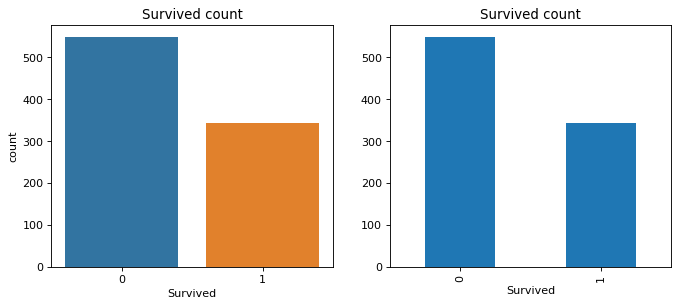

In [134]:
plt.figure(figsize=(10,4),dpi=80)
plt.subplot(121)
#sns.countplot(x='Survived',data=data)
sns.countplot(data['Survived'])
plt.title('Survived count')

plt.subplot(122)
data.groupby('Survived').count()['PassengerId'].plot('bar')
plt.title('Survived count')
plt.show()

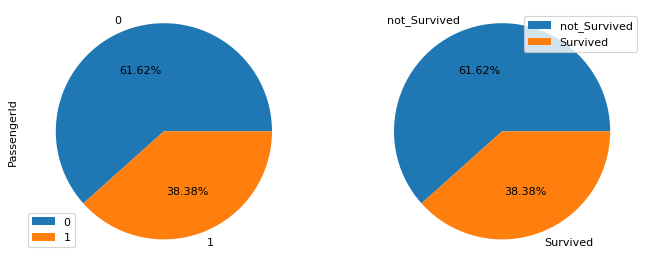

In [135]:
plt.figure(figsize=(10,4),dpi=80)
plt.subplot(121)
data.groupby('Survived').count()['PassengerId'].plot('pie',labels=data['Survived'].unique(),autopct="%1.2f%%")
plt.axis('equal')
plt.legend()

plt.subplot(122)
plt.pie([data_not_survived,data_survived],labels=['not_Survived','Survived'],autopct="%1.2f%%")
plt.axis('equal')
plt.legend()
plt.show()

- 生还者有342人,占总人数的38.38%，遇难者有549人，占总人数的61.61%

### 1乘客存活情况和性别的关系
#### 数据集总体性别情况

In [105]:
data['PassengerId'].count()

891

In [131]:
male_number = data[data['Sex']=='male']['PassengerId'].count()
male_number

577

In [132]:
female_number = data[data['Sex']=='female']['PassengerId'].count()
female_number

314

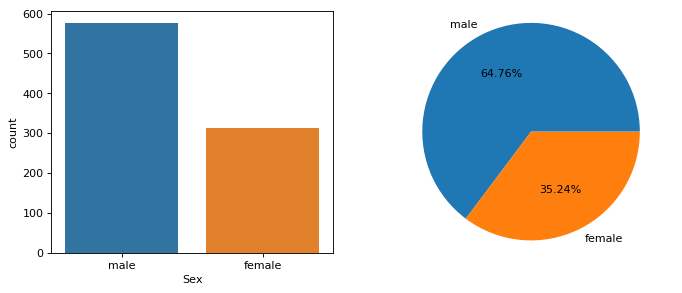

In [136]:
plt.figure(figsize=(10,4),dpi=80)
plt.subplot(121)
sns.countplot(data['Sex'])
plt.subplot(122)
plt.pie([male_number,female_number],labels=data['Sex'].unique(),autopct='%1.2f%%')
plt.axis('equal')
plt.show()

- 数据集中一共有人数891人，其中女性314人占35.24%，男性577人占64.76%

#### 数据集生存下来的人中男女的占比

In [108]:
data_survived = data[data['Survived']==1]['PassengerId'].count()
data_survived

342

In [138]:
# 存活数据集
data_survived = data[data['Survived']==1]
# 存活数据集中的男性
male_survived_number = data_survived[data_survived['Sex']=='male']['Sex'].count()
male_survived_number

109

In [139]:
# 存活数据集
data_survived = data[data['Survived']==1]
# 存活数据集中的女性
female_survived_number = data_survived[data_survived['Sex']=='female']['Sex'].count()
male_survived_number

109

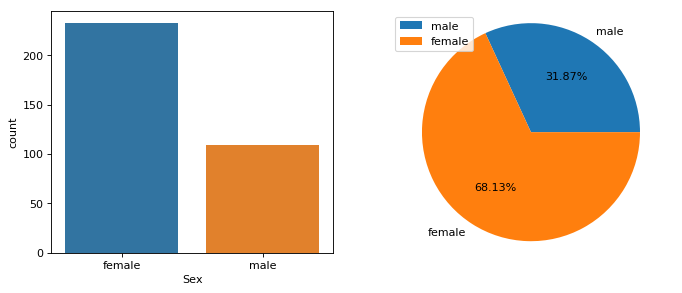

In [164]:
plt.figure(figsize=(10,4),dpi=80)
plt.subplot(121)
sns.countplot(x='Sex',data=data_survived)
plt.subplot(122)
plt.pie([male_survived_number,female_survived_number],labels=['male','female'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

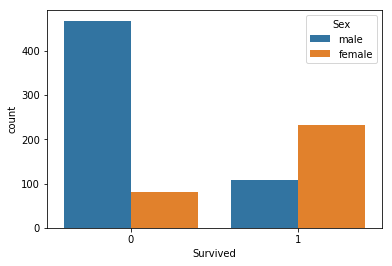

In [165]:
sns.countplot(data['Survived'],hue=data['Sex'])
plt.show()

- 一共存活了342人，其中女性存活233人，占总存活人数的68.13%，男性存活109人，占总存活人数的31.87%

#### 男性乘客的存活状况

In [119]:
male = data[data['Sex']=='male']
male_number = data[data['Sex']=='male']['PassengerId'].count()
male_number

577

In [150]:
data_survived = data[data['Survived']==1]
male_survived_number = data_survived[data_survived['Sex']=='male']['Sex'].count()
male_survived_number

109

In [154]:
data_not_survived = data[data['Survived']==0]
male_not_survived_number = data_not_survived[data_not_survived['Sex']=='male']['Sex'].count()
male_not_survived_number

468

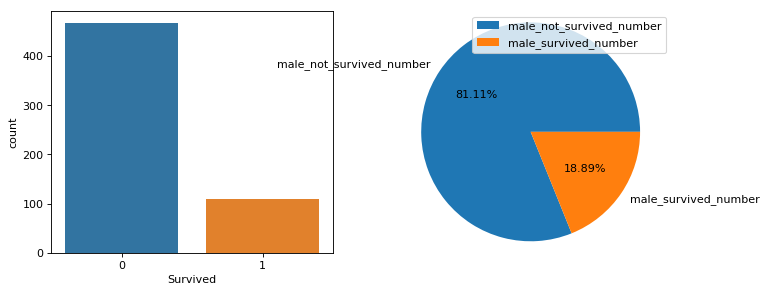

In [155]:
plt.figure(figsize=(10,4),dpi=80)
plt.subplot(121)
sns.countplot(x='Survived',data=male)
plt.subplot(122)
plt.pie([male_not_survived_number,male_survived_number],labels=['male_not_survived_number','male_survived_number'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

- 男性一共有577人，其中存活了109人，占男性总人数的18.89%

#### 女性乘客的存活状况

In [157]:
female = data[data['Sex']=='female']
female_number = data[data['Sex']=='female']['PassengerId'].count()
female_number

314

In [158]:
data_survived = data[data['Survived']==1]
female_survived_number = data_survived[data_survived['Sex']=='female']['Sex'].count()
female_survived_number

233

In [159]:
data_not_survived = data[data['Survived']==0]
female_not_survived_number = data_not_survived[data_not_survived['Sex']=='female']['Sex'].count()
female_not_survived_number

81

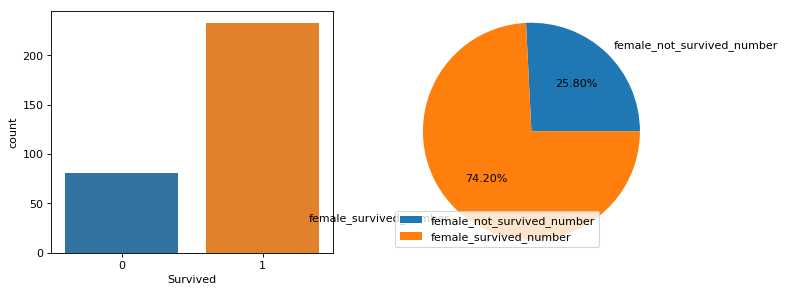

In [160]:
plt.figure(figsize=(10,4),dpi=80)
plt.subplot(121)
sns.countplot(x='Survived',data=female)
plt.subplot(122)
plt.pie([female_not_survived_number,female_survived_number],labels=['female_not_survived_number','female_survived_number'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

- 女性一共有314人，其中存活了233人，占女性总人数的74.2%

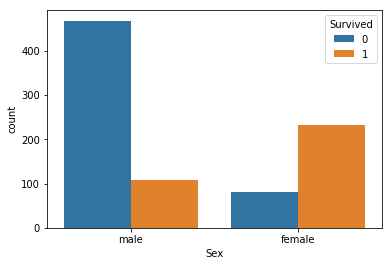

In [163]:
sns.countplot(data['Sex'],hue=data['Survived'])
plt.show()

- 占男性总人数的18.89%男性存活，占女性总人数的74.2%女性存活

### 2乘客存活情况和所在客舱的关系

#### 海难发生前，各个客舱人员的情况

In [167]:
data.groupby('Pclass')['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

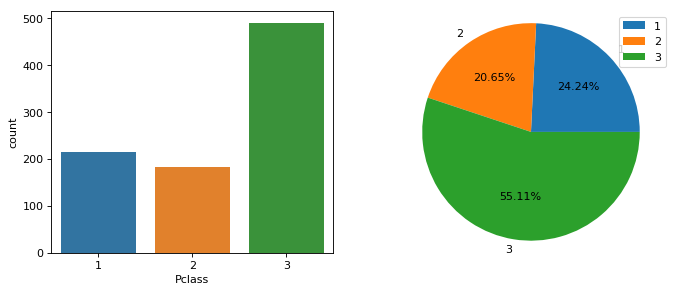

In [171]:
plt.figure(figsize=(10,4),dpi=80)
plt.subplot(121)
sns.countplot(data['Pclass'])
plt.subplot(122)
plt.pie(data.groupby('Pclass')['PassengerId'].count(),labels=['1','2','3'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

- 一等舱、二等舱、三等舱的乘客分别为216、184、491人，分别占总人数的 24.24%， 20.65%， 55.11%

#### 海难发生之后，各个客舱存活人员的情况

In [214]:
data_survived = data[data['Survived']==1]

In [174]:
data_survived.groupby('Pclass')['PassengerId'].count()

Pclass
1    136
2     87
3    119
Name: PassengerId, dtype: int64

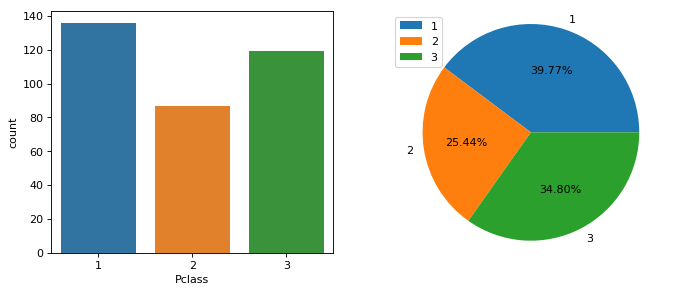

In [175]:
plt.figure(figsize=(10,4),dpi=80)
plt.subplot(121)
sns.countplot(x='Pclass',data=data_survived)
plt.subplot(122)
plt.pie(data_survived.groupby('Pclass')['PassengerId'].count(),labels=['1','2','3'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

- 海难发生后，一等舱、二等舱、三等舱的乘客存活人数变为136、87、119人，分别占总人数的 39.77%, 25.44%, 34.80%

#### 各等级客舱存活的人员的比例

In [190]:
pclass1 = data[data['Pclass']==1]
pclass1['PassengerId'].count()

216

In [198]:
pclass1_survived =pclass1[pclass1['Survived']==1]
pclass1_survived['PassengerId'].count()

136

In [200]:
pclass1_not_survived = pclass1['PassengerId'].count() - pclass1_survived['PassengerId'].count()
pclass1_not_survived

80

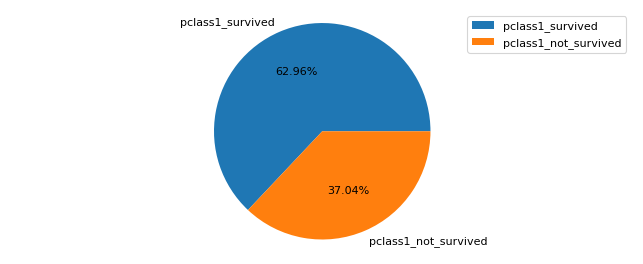

In [201]:
plt.figure(figsize=(10,4),dpi=80)
plt.pie([pclass1_survived['PassengerId'].count(),pclass1_not_survived],labels=['pclass1_survived','pclass1_not_survived'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

In [203]:
pclass2 = data[data['Pclass']==2]
pclass2['PassengerId'].count()

184

In [206]:
pclass2_survived =pclass2[pclass2['Survived']==1]
pclass2_survived['PassengerId'].count()

87

In [207]:
pclass2_not_survived = pclass2['PassengerId'].count() - pclass2_survived['PassengerId'].count()
pclass2_not_survived

97

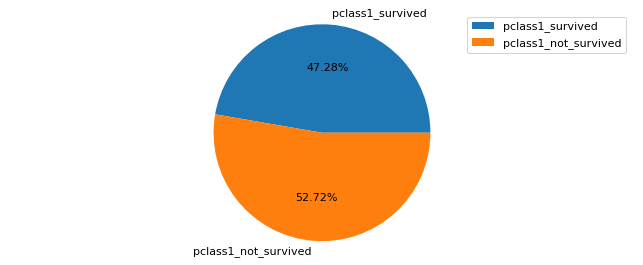

In [208]:
plt.figure(figsize=(10,4),dpi=80)
plt.pie([pclass2_survived['PassengerId'].count(),pclass2_not_survived],labels=['pclass1_survived','pclass1_not_survived'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

In [209]:
pclass3 = data[data['Pclass']==3]
pclass3['PassengerId'].count()


491

In [210]:
pclass3_survived =pclass3[pclass3['Survived']==1]
pclass3_survived['PassengerId'].count()

119

In [211]:
pclass3_not_survived = pclass3['PassengerId'].count() - pclass3_survived['PassengerId'].count()
pclass3_not_survived

372

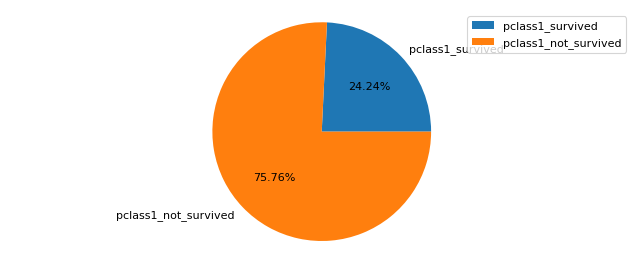

In [212]:
plt.figure(figsize=(10,4),dpi=80)
plt.pie([pclass3_survived['PassengerId'].count(),pclass3_not_survived],labels=['pclass1_survived','pclass1_not_survived'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

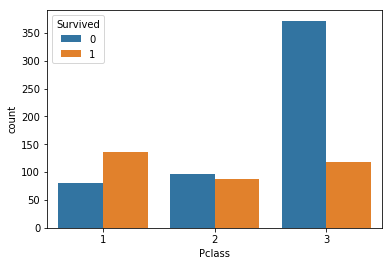

In [213]:
sns.countplot(data['Pclass'],hue=data['Survived'])
plt.show()

- 一等舱存活率为 62.96%，二等舱为 47.28%，三等舱为 24.24%；客舱等级越高，生还率越高

### 3乘客存活情况和其年龄的关系

- 因为Age存在缺失值，我们需要先填补缺失值，一般我们选择填补空缺值，但是这样很容易造成数据堆叠，如果我们选择删除，本来只有800多列的数据，要一次删除100多列，会造成数据结果的不准确性
- 我们选择求出这列数组的平均值和标准差，然后在范围内随机抽取数值插入数组中

In [349]:
data_age_avarage = data['Age'].mean()
data_age_std = data['Age'].std()
data_age_null = data['Age'].isnull().sum()

In [350]:
random_number = np.random.randint(data_age_avarage - data_age_std, data_age_avarage + data_age_std, data_age_null)

In [351]:
random_number.shape

(177,)

In [352]:
type(data['Age'])

pandas.core.series.Series

In [354]:
# 填补缺失值
data['Age'][np.isnan(data['Age'])] = random_number

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [356]:
data['Age'].isnull().any()

False

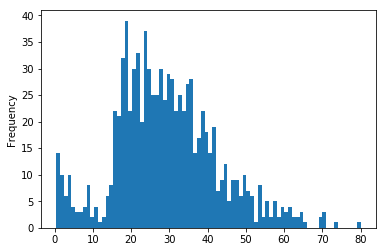

In [357]:
data['Age'].plot('hist',bins=80)
plt.show()

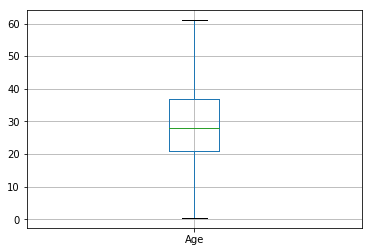

In [360]:
data.boxplot(column = 'Age', showfliers = False)
plt.show()

In [361]:
data['Age'].describe()

count    891.000000
mean      29.504119
std       13.506851
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

- 这组数据中，年龄最大80岁，年龄最小0.42岁，平均年龄29.5岁
- 将年龄分成四组 0-19 20-39 40-59 60-80

In [365]:
data1 = data[data['Age'] <= 19]

In [376]:
data1['PassengerId'].count()

199

In [377]:
data1['Survived'].sum()

91

In [379]:
data1_not_survived = data1['PassengerId'].count() - data1['Survived'].sum()
data1_not_survived

108

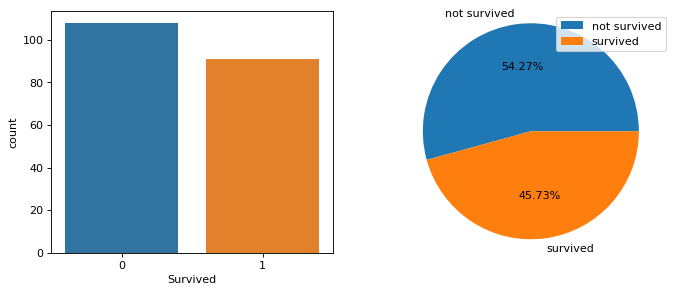

In [384]:
plt.figure(figsize=(10,4),dpi=80)
plt.subplot(121)
sns.countplot(x= 'Survived',data = data1)
plt.subplot(122)
plt.pie([data1_not_survived,data1['Survived'].sum()],labels=['not survived','survived'], autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

In [ ]:
data2 = data[(data['Age'] >= 20) & (data['Age'] <=39)]

In [386]:
data2['PassengerId'].count()

510

In [387]:
data2['Survived'].sum()

184

In [389]:
data2_not_survived = data2['PassengerId'].count() - data2['Survived'].sum()
data2_not_survived

326

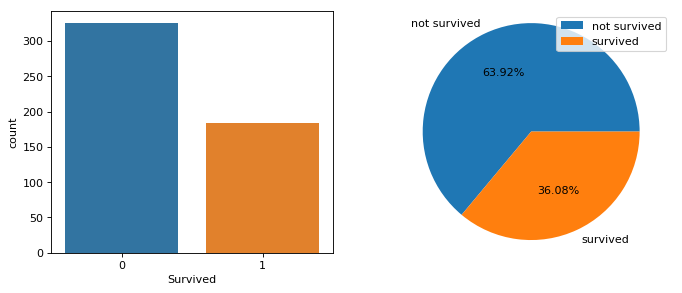

In [390]:
plt.figure(figsize=(10,4),dpi=80)
plt.subplot(121)
sns.countplot(x= 'Survived',data = data2)
plt.subplot(122)
plt.pie([data2_not_survived,data2['Survived'].sum()],labels=['not survived','survived'], autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

In [398]:
data3 = data[(data['Age'] >= 40) & (data['Age'] <=59)]

In [392]:
data3['PassengerId'].count()

156

In [393]:
data3['Survived'].sum()

60

In [396]:
data3_not_survived = data3['PassengerId'].count() - data3['Survived'].sum()
data3_not_survived

96

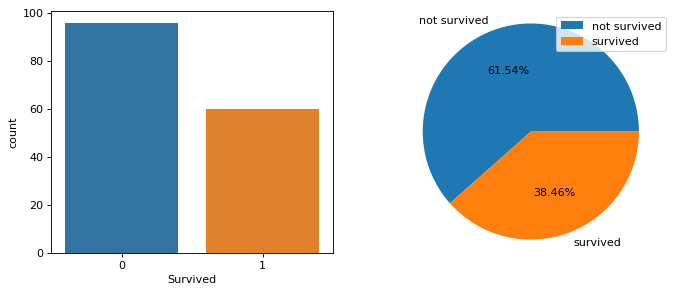

In [397]:
plt.figure(figsize=(10,4),dpi=80)
plt.subplot(121)
sns.countplot(x= 'Survived',data = data3)
plt.subplot(122)
plt.pie([data3_not_survived,data3['Survived'].sum()],labels=['not survived','survived'], autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

In [399]:
data4 = data[(data['Age'] >= 60) & (data['Age'] <=80)]

In [400]:
data4['PassengerId'].count()

26

In [402]:
data4['Survived'].sum()

7

In [403]:
data4_not_survived = data4['PassengerId'].count() - data4['Survived'].sum()
data4_not_survived

19

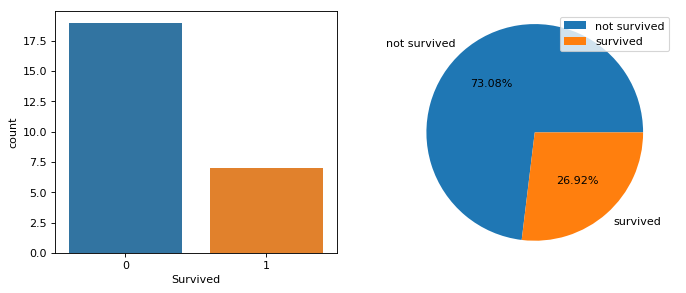

In [404]:
plt.figure(figsize=(10,4),dpi=80)
plt.subplot(121)
sns.countplot(x= 'Survived',data = data4)
plt.subplot(122)
plt.pie([data4_not_survived,data4['Survived'].sum()],labels=['not survived','survived'], autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

- 0-19岁之间有199人 幸存91人，幸存率45.73%
- 20-39岁之间有510人，幸存144人，幸存率36.08%
- 40-59岁之间有156人，幸存60人，幸存率38.46%
- 60-80岁之间有26人，幸存7人，幸存率26.92%
- 20-39岁之间幸存人数最多，0-19岁之间幸存率最高

### 4乘客存活情况和其在船上是否有兄弟姐妹

In [215]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [217]:
data.groupby('SibSp')['PassengerId'].count()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: PassengerId, dtype: int64

In [224]:
sibsp = data[data['SibSp']!=0]
no_sibsp = data[data['SibSp']==0]

In [225]:
sibsp['PassengerId'].count()

283

In [223]:
sibsp_survived = sibsp[sibsp['Survived']==1]
sibsp_survived['PassengerId'].count()

132

In [227]:
sibsp_not_survived =sibsp['PassengerId'].count() - sibsp_survived['PassengerId'].count()
sibsp_not_survived

151

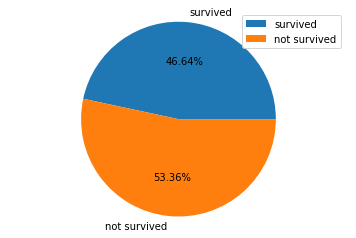

In [235]:
plt.pie([sibsp_survived['PassengerId'].count(),sibsp_not_survived],labels=['survived','not survived'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

- 有兄弟姐妹的乘客，一共有283人，存活了132人，存活率46.64%

In [231]:
no_sibsp = data[data['SibSp']==0]
no_sibsp['PassengerId'].count()

608

In [232]:
no_sibsp_survived = no_sibsp[no_sibsp['Survived']==1]
no_sibsp_survived['PassengerId'].count()

210

In [233]:
no_sibsp_not_survived =no_sibsp['PassengerId'].count() - no_sibsp_survived['PassengerId'].count()
no_sibsp_not_survived

398

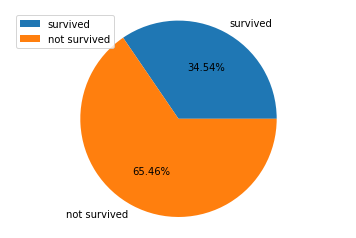

In [234]:
plt.pie([no_sibsp_survived['PassengerId'].count(),no_sibsp_not_survived],labels=['survived','not survived'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

- 没有兄弟姐妹的乘客，一共有608人，存活了210人，存活率34.54%

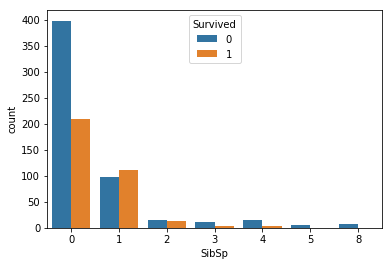

In [236]:
sns.countplot(data['SibSp'],hue=data['Survived'])
plt.show()

- 有兄弟姐妹在船上的人的生存率要大于没有兄弟姐妹在船上的人

### 5乘客存活情况和其在船上是否有父母或子女

In [216]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [244]:
parch = data[data['Parch']!=0]
parch['PassengerId'].count()

213

In [245]:
parch_survived =parch[parch['Survived']==1]
parch_survived['PassengerId'].count()

109

In [246]:
parch_not_survived =  parch['PassengerId'].count() - parch_survived['PassengerId'].count()
parch_not_survived

104

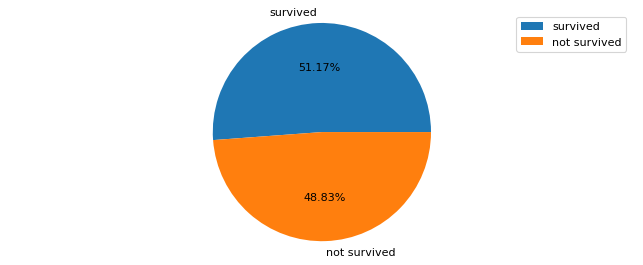

In [247]:
plt.figure(figsize=(10,4),dpi=80)
plt.pie([parch_survived['PassengerId'].count(),parch_not_survived],labels=['survived','not survived'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

- 父母子女在船上的乘客有213人，其中109人存活，存活率为51.17%

In [248]:
no_parch = data[data['Parch']==0]
no_parch['PassengerId'].count()

678

In [249]:
no_parch_survived =no_parch[no_parch['Survived']==1]
no_parch_survived['PassengerId'].count()

233

In [252]:
no_parch_not_survived =  no_parch['PassengerId'].count() - no_parch_survived['PassengerId'].count()
no_parch_not_survived

445

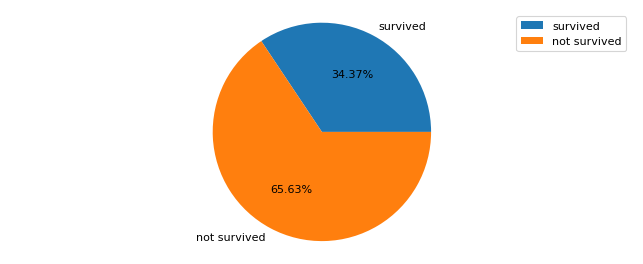

In [253]:
plt.figure(figsize=(10,4),dpi=80)
plt.pie([no_parch_survived['PassengerId'].count(),no_parch_not_survived],labels=['survived','not survived'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

- 船上没有父母子女的乘客一共有678人，其中存活233人，存活率为34.37%

### 6乘客存活情况和其所持船票的票价

In [254]:
data['Fare'].unique()

array([   7.25  ,   71.2833,    7.925 ,   53.1   ,    8.05  ,    8.4583,
         51.8625,   21.075 ,   11.1333,   30.0708,   16.7   ,   26.55  ,
         31.275 ,    7.8542,   16.    ,   29.125 ,   13.    ,   18.    ,
          7.225 ,   26.    ,    8.0292,   35.5   ,   31.3875,  263.    ,
          7.8792,    7.8958,   27.7208,  146.5208,    7.75  ,   10.5   ,
         82.1708,   52.    ,    7.2292,   11.2417,    9.475 ,   21.    ,
         41.5792,   15.5   ,   21.6792,   17.8   ,   39.6875,    7.8   ,
         76.7292,   61.9792,   27.75  ,   46.9   ,   80.    ,   83.475 ,
         27.9   ,   15.2458,    8.1583,    8.6625,   73.5   ,   14.4542,
         56.4958,    7.65  ,   29.    ,   12.475 ,    9.    ,    9.5   ,
          7.7875,   47.1   ,   15.85  ,   34.375 ,   61.175 ,   20.575 ,
         34.6542,   63.3583,   23.    ,   77.2875,    8.6542,    7.775 ,
         24.15  ,    9.825 ,   14.4583,  247.5208,    7.1417,   22.3583,
          6.975 ,    7.05  ,   14.5   ,   15.0458, 

In [255]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

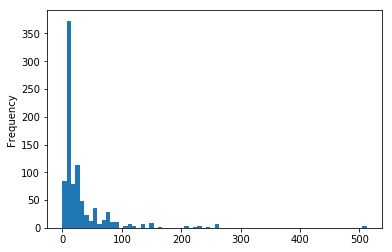

In [259]:
data['Fare'].plot('hist',bins=70)
plt.show()

D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


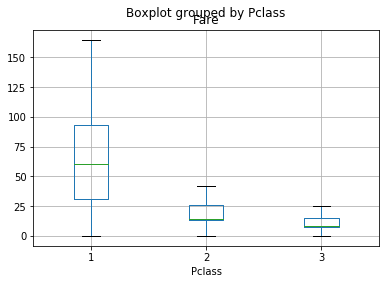

In [268]:
data.boxplot(column = 'Fare', by = 'Pclass',showfliers = False)
plt.show()

In [273]:
fare_survived = data_survived['Fare']

In [276]:
fare_survived.mean()

48.39540760233917

In [277]:
fare_survived.std()

66.59699811829472

In [271]:
fare_not_survived = data_not_survived['Fare']

In [278]:
fare_not_survived.mean()

22.117886885245877

In [279]:
fare_not_survived.std()

31.388206530563984

D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


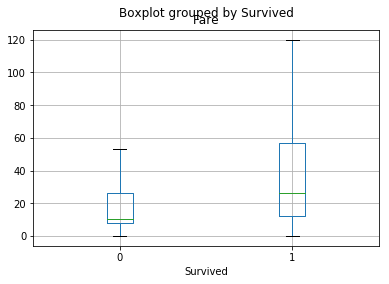

In [281]:
data.boxplot(column = 'Fare', by = 'Survived',showfliers = False)
plt.show()

- 生存者的平均票价是高于未生存者，票价和生存性有一定关系

### 7乘客存活情况和其所持客舱号码

In [288]:
data['Cabin'].isnull().sum()

687

- 数据集中一共有891行数据，'Cabin'这列有687个缺失值，缺失值太多，这列不予讨论

### 8乘客存活情况和其起航运港

In [296]:
data['Embarked'].isnull().sum()

2

In [297]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [295]:
data[data['Embarked'] =='S']['PassengerId'].count()

644

In [299]:
data[data['Embarked'] =='C']['PassengerId'].count()

168

In [298]:
data[data['Embarked'] =='Q']['PassengerId'].count()

77

- 我们可以选择填补或者删除缺失值，因为样本本来只有800多行，我们选择填补缺失值，填补的数据为3个港口中登船人数最多的S港

In [300]:
data['Embarked'].fillna('S',inplace=True)

In [302]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [303]:
data['Embarked'].isnull().sum()

0

In [304]:
data[data['Embarked'] =='S']['PassengerId'].count()

646

In [310]:
Embarked_S = data[data['Embarked'] =='S']
Embarked_S_survived = Embarked_S[Embarked_S['Survived']==1]
Embarked_S_survived['PassengerId'].count()

219

In [316]:
Embarked_S_not_survived = data[data['Embarked'] =='S']['PassengerId'].count() - Embarked_S_survived['PassengerId'].count()
Embarked_S_not_survived

427

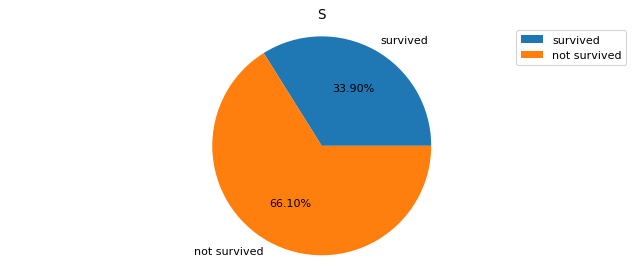

In [321]:
plt.figure(figsize=(10,4),dpi=80)
plt.pie([Embarked_S_survived['PassengerId'].count(),Embarked_S_not_survived],labels=['survived','not survived'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.title('Southampton')
plt.show()

- Southampton一共有646人上船，其中存活219人，存活率33.90%

In [323]:
data[data['Embarked'] =='C']['PassengerId'].count()

168

In [325]:
Embarked_C = data[data['Embarked'] =='C']
Embarked_C_survived = Embarked_C[Embarked_C['Survived']==1]
Embarked_C_survived['PassengerId'].count()

93

In [326]:
Embarked_C_not_survived = data[data['Embarked'] =='C']['PassengerId'].count() - Embarked_C_survived['PassengerId'].count()
Embarked_C_not_survived

75

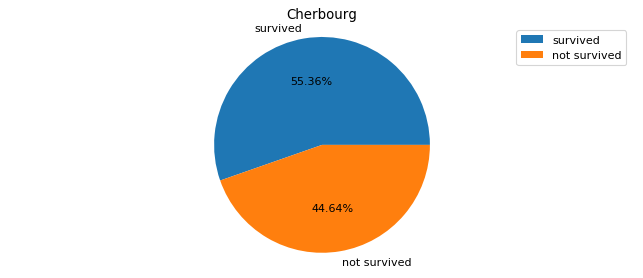

In [327]:
plt.figure(figsize=(10,4),dpi=80)
plt.pie([Embarked_C_survived['PassengerId'].count(),Embarked_C_not_survived],labels=['survived','not survived'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.title('Cherbourg')
plt.show()

- Cherbourg一共有168人上船，其中存活93人，存活率55.36%

In [328]:
data[data['Embarked'] =='Q']['PassengerId'].count()

77

In [329]:
Embarked_Q = data[data['Embarked'] =='Q']
Embarked_Q_survived = Embarked_Q[Embarked_Q['Survived']==1]
Embarked_Q_survived['PassengerId'].count()

30

In [330]:
Embarked_Q_not_survived = data[data['Embarked'] =='Q']['PassengerId'].count() - Embarked_Q_survived['PassengerId'].count()
Embarked_Q_not_survived

47

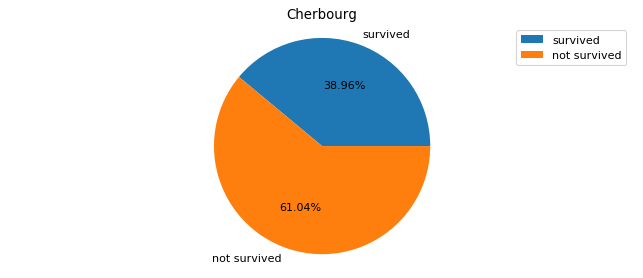

In [331]:
plt.figure(figsize=(10,4),dpi=80)
plt.pie([Embarked_Q_survived['PassengerId'].count(),Embarked_Q_not_survived],labels=['survived','not survived'],autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.title('Queenstown')
plt.show()

- Queenstown一共有77人上船，其中30人幸存，幸存率38.96%

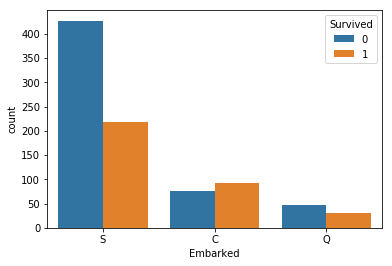

In [314]:
sns.countplot(data['Embarked'],hue=data['Survived'])
plt.show()

- 虽然在Southampton上船最后幸存的人数最多，但是Southampton却是三座港口中幸存率最低的；Cherbourg港口的幸存率最高，达到了55.36%

# 总结
## 1
- 生还者有342人,占总人数的38.38%，遇难者有549人，占总人数的61.61%
- 一共有人数891人，其中女性314人占35.24%，男性577人占64.76%
- 一共存活了342人，其中女性存活233人，占总存活人数的68.13%，男性存活109人，占总存活人数的31.87%
- 男性一共有577人，其中存活了109人，占男性总人数的18.89%
- 女性一共有314人，其中存活了233人，占女性总人数的74.2%
## 2
- 一等舱、二等舱、三等舱的乘客分别为216、184、491人，分别占总人数的 24.24%， 20.65%， 55.11%
- 海难发生后，一等舱、二等舱、三等舱的乘客存活人数变为136、87、119人，分别占总人数的 39.77%, 25.44%, 34.80%
- 一等舱存活率为 62.96%，二等舱为 47.28%，三等舱为 24.24%；客舱等级越高，生还率越高
## 3
- 年龄最大80岁，年龄最小0.42岁，平均年龄29.5岁
- 将年龄分成四组 0-19 20-39 40-59 60-80
- 0-19岁之间有199人 幸存91人，幸存率45.73%
- 20-39岁之间有510人，幸存144人，幸存率36.08%
- 40-59岁之间有156人，幸存60人，幸存率38.46%
- 60-80岁之间有26人，幸存7人，幸存率26.92%
- 20-39岁之间幸存人数最多，0-19岁之间幸存率最高
## 4
- 有兄弟姐妹的乘客，一共有283人，存活了132人，存活率46.64%
- 没有兄弟姐妹的乘客，一共有608人，存活了210人，存活率34.54%
## 5
- 父母子女在船上的乘客有213人，其中109人存活，存活率为51.17%
- 船上没有父母子女的乘客一共有678人，其中存活233人，存活率为34.37%
## 6
- 生存者的平均票价是高于未生存者，票价和生存性有一定关系
## 7
- Southampton一共有646人上船，其中存活219人，存活率33.90%
- Cherbourg一共有168人上船，其中存活93人，存活率55.36%
- Queenstown一共有77人上船，其中30人幸存，幸存率38.96%
- 虽然在Southampton上船最后幸存的人数最多，但是Southampton却是三座港口中幸存率最低的；Cherbourg港口的幸存率最高，达到了55.36%